In [12]:
# Incantations to make graphs pretty
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 240

In [ ]:
from stop_words import get_stop_words
stopwords = get_stop_words('en')

In [9]:
import re, nltk
import pandas as pd
from afinn import Afinn
from nltk.tokenize import sent_tokenize

In [5]:
def afinn_sentiment(text):
    afinn = Afinn()
    sentences = sent_tokenize(text)
    sentiments = [afinn.score(sentence) for sentence in sentences ]
    return sentiments

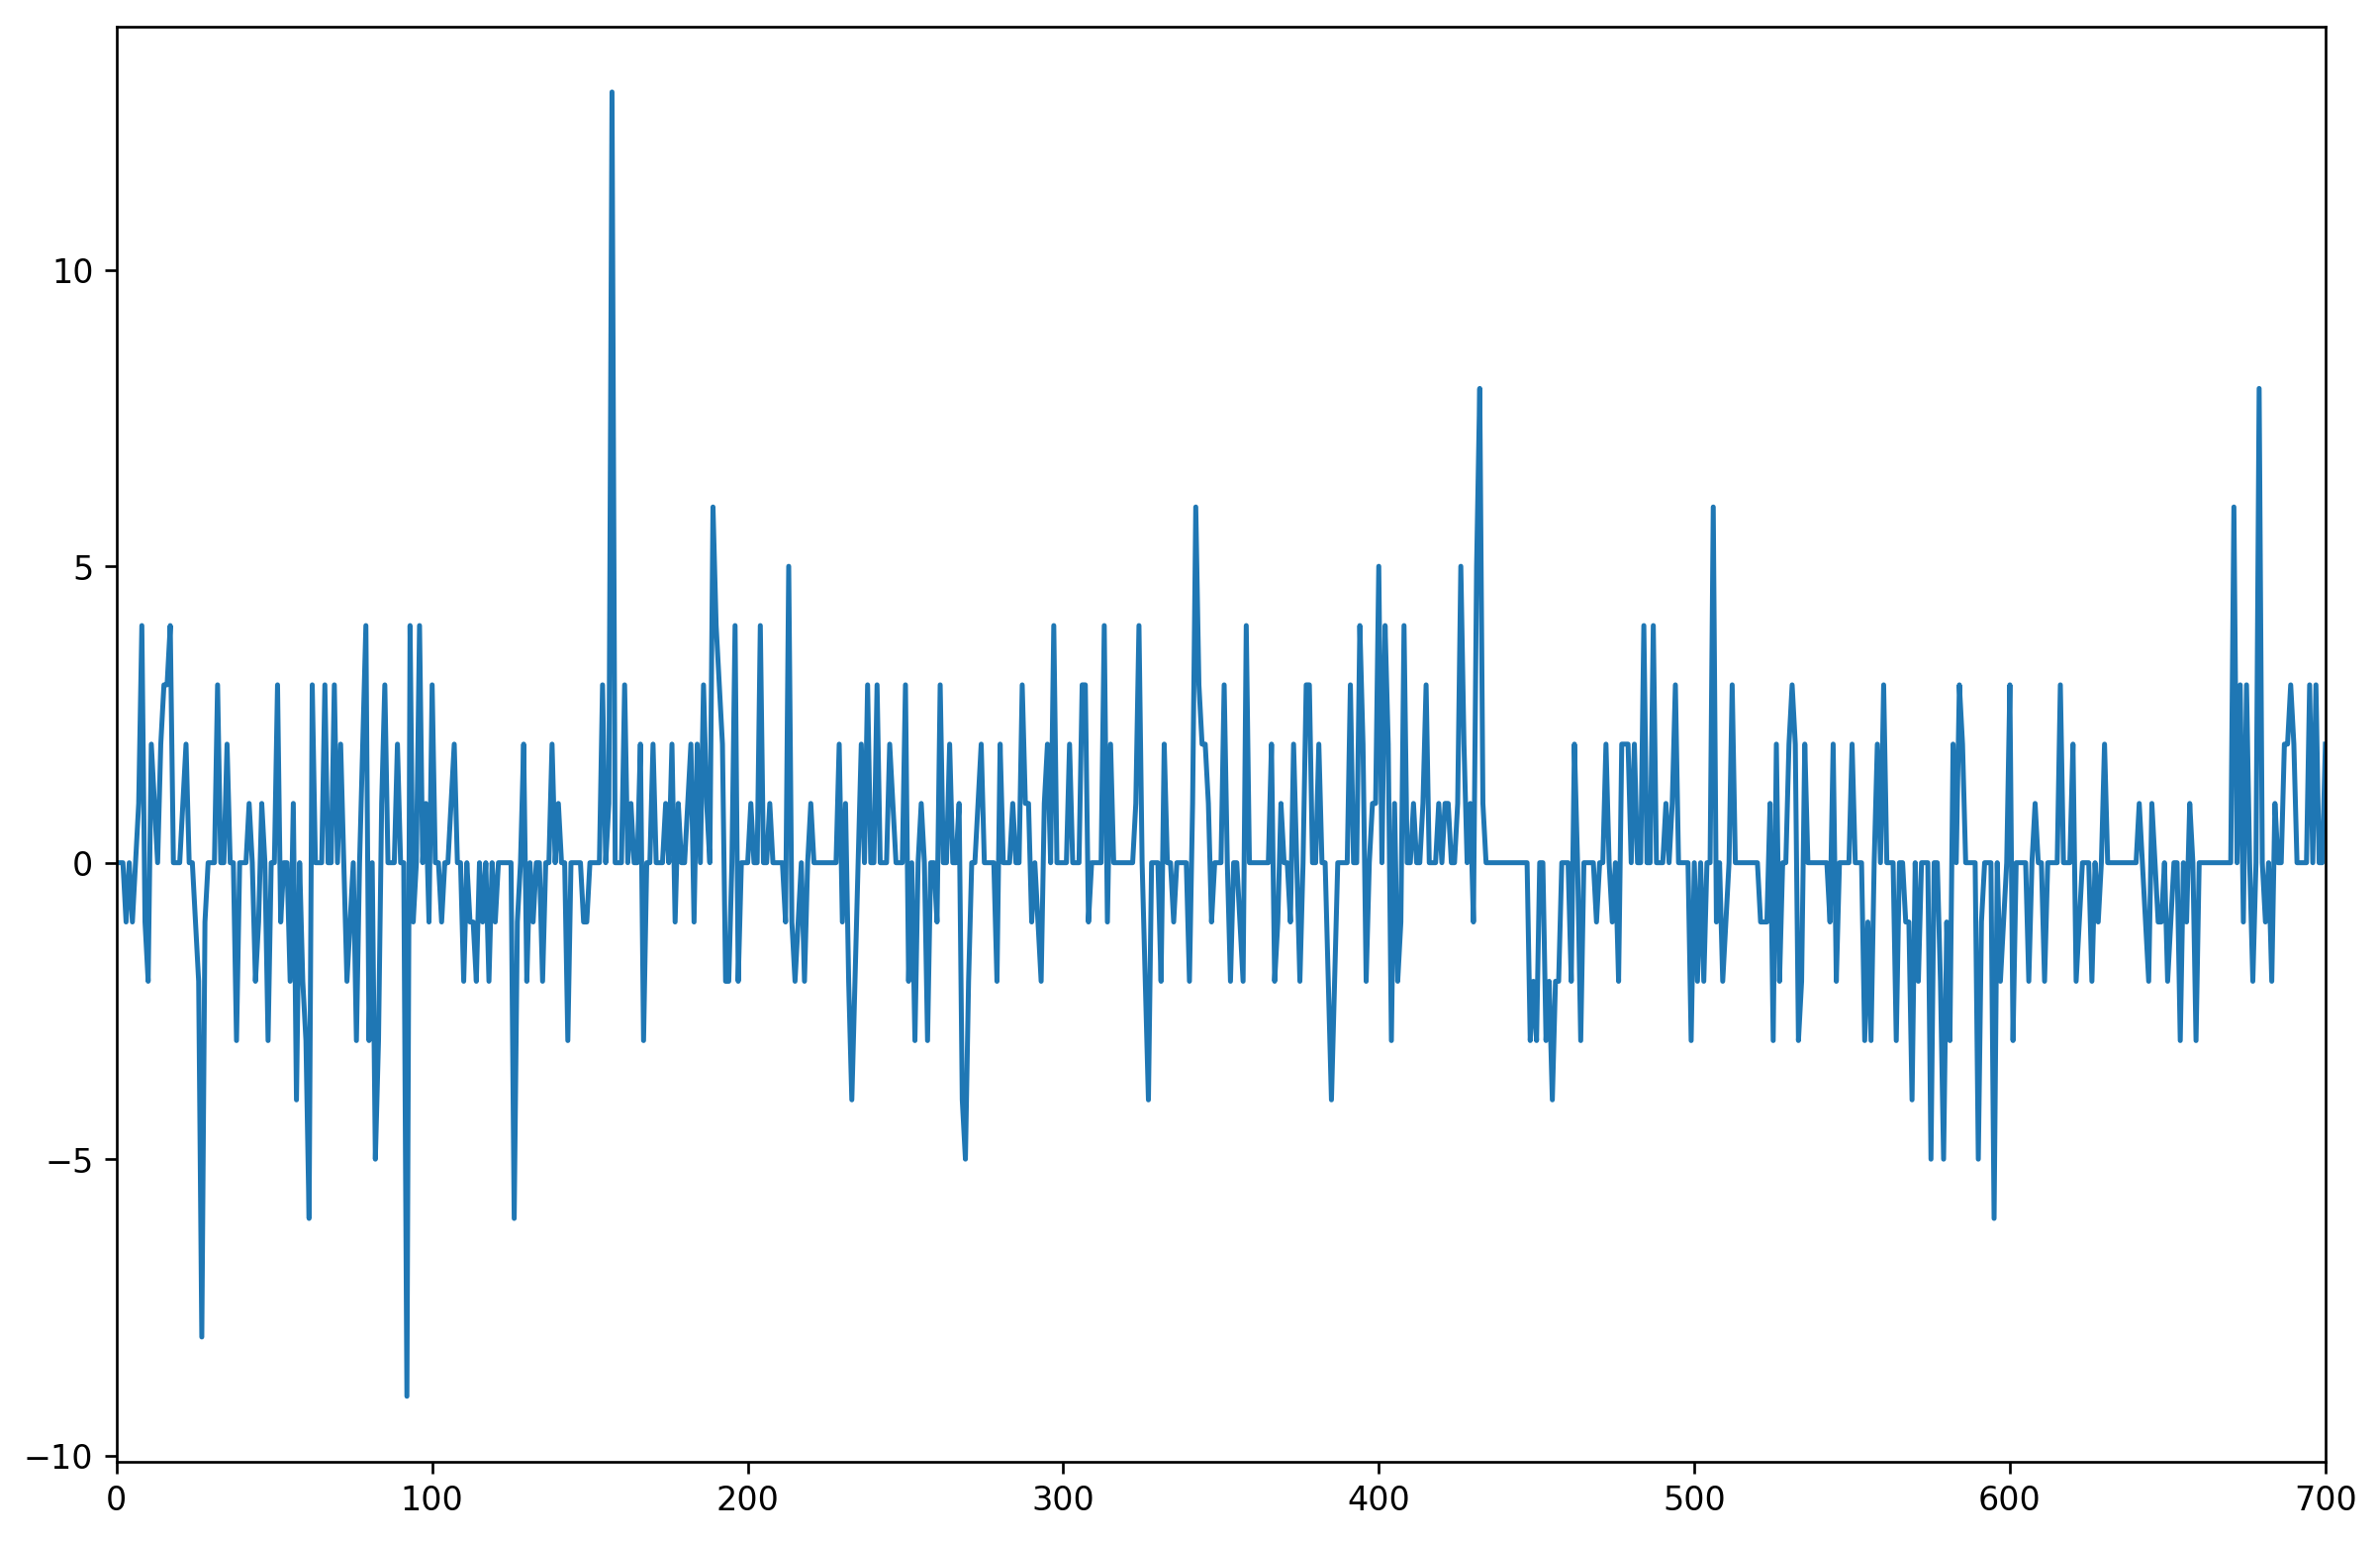

In [14]:
# Open and read out text
text = open('texts/most_dangerous_game.txt', 'r').read()

# Assign each of the sentences a cumulative sentiment value based on its words
sentiments = afinn_sentiment(text)

# Be lazy: use a panda series for easy graphing
series = pd.Series(sentiments)
ax = series.plot()

Just to "see" if the results we are getting are not entirely random, we can generate a series of random numbers to compare:

In [16]:
import random

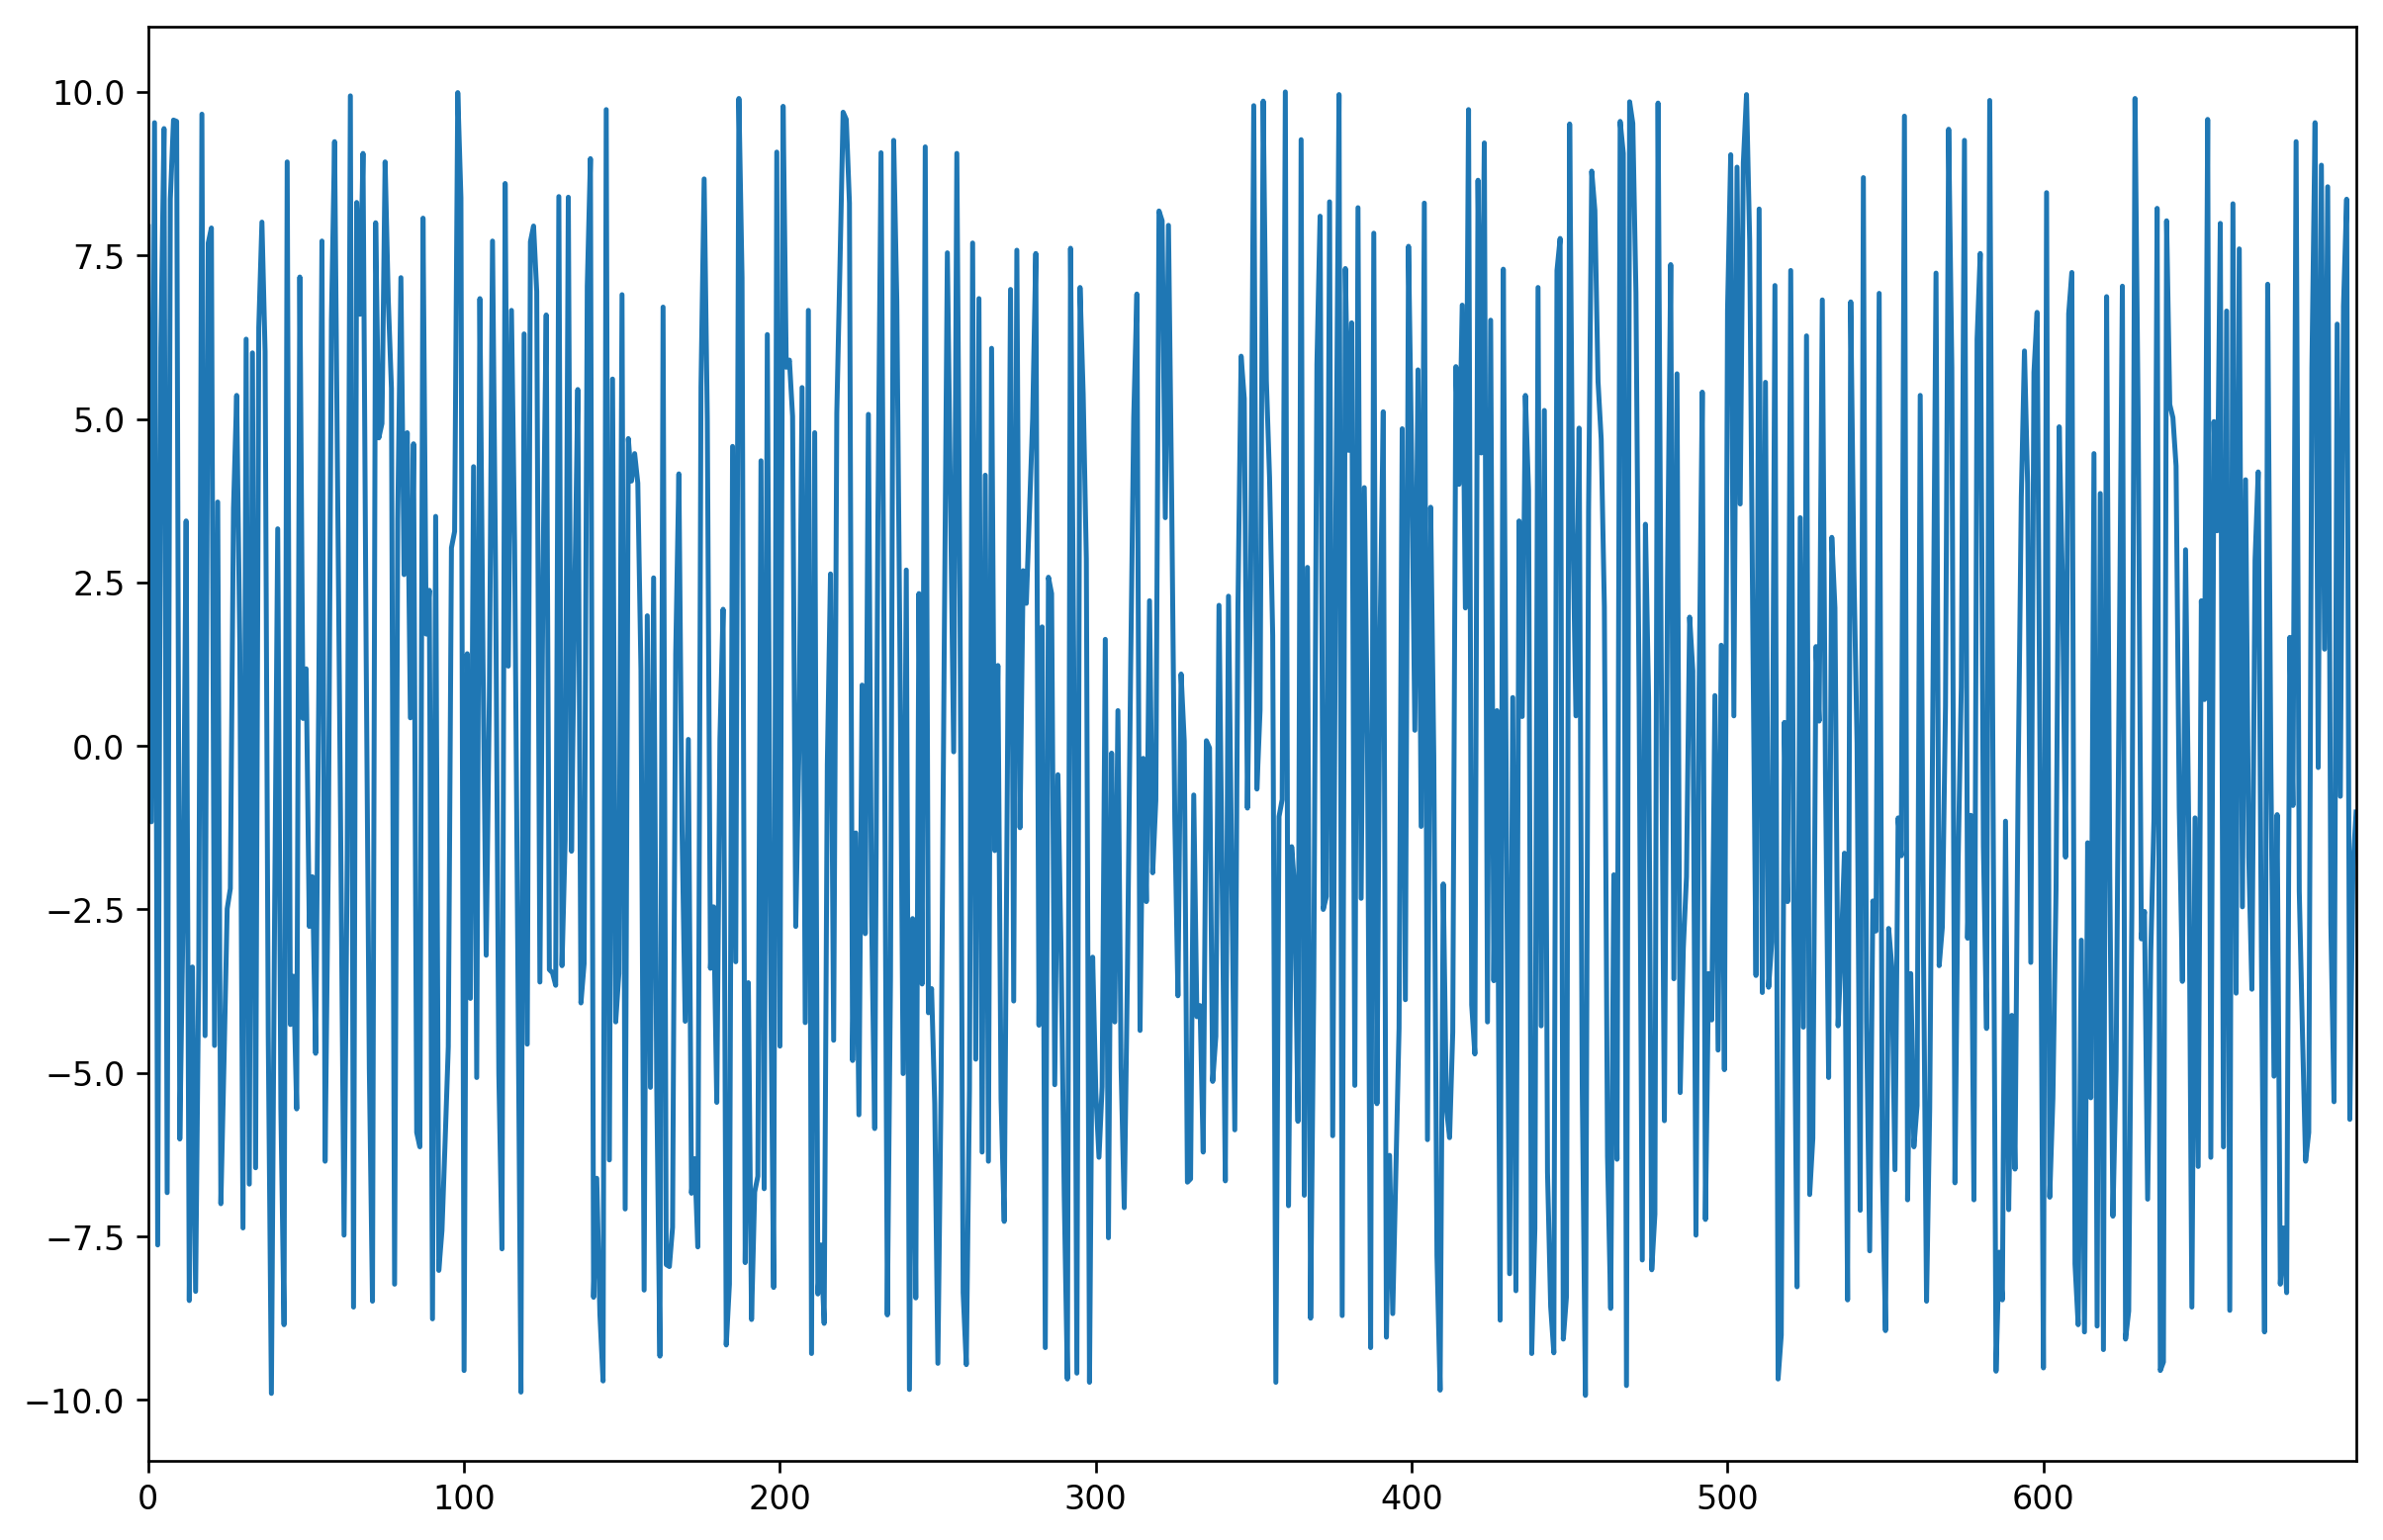

In [25]:
randoms = pd.Series([round(random.uniform(-10, 10), 2) for _ in range(700)])
ax = randoms.plot()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
result = seasonal_decompose(series, model='multiplicative', freq=1)
ax = result.plot()
# pyplot.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values